## Package Install

In [ ]:
!pip uninstall -y transformers
!pip install -r requirements.txt

## Construction of $x_i$

In [1]:
from DataSet_Generation.Construct_Xi import generate_dataset

# Generate the dataset
filtered_df = generate_dataset(sample_size=10000, limit=5000, output_file='DataSet/X_i_samples_5k.csv')

# Now you can use filtered_df as needed
print(filtered_df.head())
print(f"Number of rows in filtered_df: {len(filtered_df)}")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/datasets/table.py:1421: FutureWarning: promote has been superseded by promote_options='default'.
  table = cls._concat_blocks(blocks, axis=0)


                                 X_i
0              usually , he would be
2          mason barely acknowledged
3  instead , his baby blues remained
4                since the movie was
5               each time she looked
Number of rows in filtered_df: 5000


## Generation of $x_j$ using LLMs

#### (1) Claude-3-haiku

In [ ]:
# !pip install anthropic

In [2]:
from huggingface_hub import login

# You should login to Hugging Face using token
login("your hugging face token")


The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: read).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [10]:
from DataSet_Generation.LLM_Claude import run_claude_generation

# Set your API key
ANTHROPIC_API_KEY = "your_api_key_here"  # Replace with your actual API key

# Run the Claude generation
results = run_claude_generation(
    api_key=ANTHROPIC_API_KEY,
    input_file='DataSet/X_i_samples_5k.csv',
    output_file='DataSet/X_ij_samples_5k_Claude-3-haiku.csv',
    batch_size=32,
    max_rows=None  # Set to None to process all rows
)

print(results.head())
print(f"Number of rows in results: {len(results)}")

100%|██████████| 1/1 [00:03<00:00,  3.35s/it]

                                 X_i  \
0              usually , he would be   
1          mason barely acknowledged   
2  instead , his baby blues remained   
3                since the movie was   

                                                 X_j             LLM  
0  usually , he would be at the office working on...  Claude-3-haiku  
1  mason barely acknowledged the presence of his ...  Claude-3-haiku  
2     instead , his baby blues remained captivating.  Claude-3-haiku  
3     since the movie was over, we left the theater.  Claude-3-haiku  
Number of rows in results: 4


In [8]:
from DataSet_Generation.LLM_Claude_5 import run_claude_generation_5

# Run the Claude generation for 5 sentences
results = run_claude_generation_5(
    api_key=ANTHROPIC_API_KEY,
    input_file='DataSet/X_i_samples_5k.csv',
    output_file='DataSet/X_ij_samples_5k_Claude-3-haiku_5sentences.csv',
    batch_size=32,
    max_rows=None  # Set to None to process all rows
)

print(results.head())
print(f"Number of rows in results: {len(results)}")

100%|██████████| 1/1 [00:05<00:00,  5.48s/it]

                                 X_i  \
0              usually , he would be   
1          mason barely acknowledged   
2  instead , his baby blues remained   
3                since the movie was   

                                                 X_j             LLM  
0  usually , he would be at work by this time, bu...  Claude-3-haiku  
1  mason barely acknowledged the client's request...  Claude-3-haiku  
2  instead , his baby blues remained transfixed o...  Claude-3-haiku  
3  since the movie was quite long, we decided to ...  Claude-3-haiku  
Number of rows in results: 4


#### (2) GPT4o-mini

In [ ]:
# !pip install openai

In [1]:
from DataSet_Generation.LLM_OpenAI import run_gpt4_mini_generation

# Set your API key
OPENAI_API_KEY = "your_api_key_here"  # Replace with your actual API key

# Run the GPT-4-mini generation
results = run_gpt4_mini_generation(
    api_key=OPENAI_API_KEY,
    input_file='DataSet/X_i_samples_5k.csv',
    output_file='DataSet/X_i_samples_5k_GPT-4o-mini.csv',
    batch_size=32,
    max_rows=None  # Set to None to process all rows
)

print(results.head())
print(f"Number of rows in results: {len(results)}")

100%|██████████| 1/1 [00:03<00:00,  3.86s/it]

                                 X_i  \
0              usually , he would be   
1          mason barely acknowledged   
2  instead , his baby blues remained   
3                since the movie was   

                                                 X_j          LLM  
0  usually , he would be at the gym by six in the...  GPT-4o-mini  
1  mason barely acknowledged her presence as he w...  GPT-4o-mini  
2  instead , his baby blues remained unfazed by t...  GPT-4o-mini  
3  since the movie was over, we decided to grab s...  GPT-4o-mini  
Number of rows in results: 4


In [2]:
from DataSet_Generation.LLM_OpenAI_5 import run_gpt4_mini_generation_5

# Run the GPT-4-mini generation for 5 sentences
results = run_gpt4_mini_generation_5(
    api_key=OPENAI_API_KEY,
    input_file='DataSet/X_i_samples_5k.csv',
    output_file='DataSet/X_ij_samples_5k_GPT-4o-mini_5sentences.csv',
    batch_size=32,
    max_rows=None  # Set to None to process all rows
)

print(results.head())
print(f"Number of rows in results: {len(results)}")

100%|██████████| 1/1 [00:07<00:00,  7.48s/it]

                                 X_i  \
0              usually , he would be   
1          mason barely acknowledged   
2  instead , his baby blues remained   
3                since the movie was   

                                                 X_j          LLM  
0  usually , he would be at the office by nine o'...  GPT-4o-mini  
1  mason barely acknowledged his friend's greetin...  GPT-4o-mini  
2  instead , his baby blues remained a captivatin...  GPT-4o-mini  
3  since the movie was so highly anticipated, man...  GPT-4o-mini  
Number of rows in results: 4


#### (3) Llama 2

In [1]:
from DataSet_Generation.LLM_MetaLlama2 import run_llama2_generation

# Run the Llama 2 generation
results = run_llama2_generation(
    input_file='DataSet/X_i_samples_5k.csv',
    output_file='DataSet/X_ij_samples_5k_Llama-2-7b-chat.csv',
    model_name="meta-llama/Llama-2-7b-chat-hf",
    batch_size=32,
    max_rows=None  # Set to None to process all rows
)

print(results.head())
print(f"Number of rows in results: {len(results)}")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
100%|██████████| 1/1 [00:02<00:00,  2.25s/it]

                                 X_i  \
0              usually , he would be   
1          mason barely acknowledged   
2  instead , his baby blues remained   
3                since the movie was   

                                                 X_j              LLM  
0                     usually , he would be at work.  Llama-2-7b-chat  
1  mason barely acknowledged his sister's birthda...  Llama-2-7b-chat  
2  instead , his baby blues remained as blue as e...  Llama-2-7b-chat  
3  since the movie was really boring, we left hal...  Llama-2-7b-chat  
Number of rows in results: 4


#### (4) Phi-3-Mini-4K

In [1]:
from DataSet_Generation.LLM_Microsoft import run_microsoft_generation

# Run the Microsoft Phi-3 generation
results = run_microsoft_generation(
    input_file='DataSet/X_i_samples_5k.csv',
    output_file='DataSet/X_ij_samples_5k_Phi-3-Mini-4K.csv',
    model_name="microsoft/Phi-3-mini-4k-instruct",
    batch_size=32,
    max_rows=None   # Set to None to process all rows
)

print(results.head())
print(f"Number of rows in results: {len(results)}")

2024-10-05 02:14:13.453657: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-05 02:14:13.453713: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-05 02:14:13.454689: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-05 02:14:13.461829: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-05 02:14:14.418080: W tensorflow/compiler/tf2

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]The `seen_tokens` attribute is deprecated and will be removed in v4.41. Use the `cache_position` model input instead.
You are not running the flash-attention implementation, expect numerical differences.
100%|██████████| 1/1 [00:04<00:00,  4.43s/it]

                                 X_i  \
0              usually , he would be   
1          mason barely acknowledged   
2  instead , his baby blues remained   
3                since the movie was   

                                                 X_j            LLM  
0  usually , he would be sitting in his office, w...  Phi-3-Mini-4K  
1  mason barely acknowledged that I had just fini...  Phi-3-Mini-4K  
2  instead , his baby blues remained instead, his...  Phi-3-Mini-4K  
3  since the movie was delayed, we decided to gra...  Phi-3-Mini-4K  
Number of rows in results: 4


In [2]:
from DataSet_Generation.LLM_Microsoft_5 import run_microsoft_generation_5

# Run the Microsoft Phi-3 generation for 5 sentences
results = run_microsoft_generation_5(
    input_file='DataSet/X_i_samples_5k.csv',
    output_file='DataSet/X_i_samples_5k_Phi-3-Mini-4K_5.csv',
    model_name="microsoft/Phi-3-mini-4k-instruct",
    batch_size=32,
    max_rows=None  # Set to None to process all rows
)

print(results.head())
print(f"Number of rows in results: {len(results)}")

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:11<00:00, 11.34s/it]

                                 X_i  \
0              usually , he would be   
1          mason barely acknowledged   
2  instead , his baby blues remained   
3                since the movie was   

                                                 X_j            LLM  
0  usually , he would be sitting quietly in his h...  Phi-3-Mini-4K  
1  mason barely acknowledged his achievements at ...  Phi-3-Mini-4K  
2  instead , his baby blues remained The baby's c...  Phi-3-Mini-4K  
3  since the movie was disappointing, I decided t...  Phi-3-Mini-4K  
Number of rows in results: 4


#### (5) Llama-3.2-3B-Instruct

In [1]:
from DataSet_Generation.LLM_MetaLlama3 import run_llama3_generation

# Run the Llama 3 generation
results = run_llama3_generation(
    input_file='DataSet/X_i_samples_5k.csv',
    output_file='DataSet/X_i_samples_5k_Llama-3.2-3B-Instruct.csv',
    model_name="meta-llama/Llama-3.2-3B-Instruct",
    batch_size=32,
    max_rows=None  # Set to None to process all rows
)

print(results.head())
print(f"Number of rows in results: {len(results)}")

2024-10-05 02:23:43.044857: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-05 02:23:43.044919: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-05 02:23:43.046097: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-05 02:23:43.052524: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-05 02:23:43.877296: W tensorflow/compiler/tf2

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:04<00:00,  4.16s/it]

                                 X_i  \
0              usually , he would be   
1          mason barely acknowledged   
2  instead , his baby blues remained   
3                since the movie was   

                                                 X_j                    LLM  
0  usually , he would be home watching TV when hi...  Llama-3.2-3B-Instruct  
1  mason barely acknowledged the presence of his ...  Llama-3.2-3B-Instruct  
2  instead , his baby blues remained a steadfast ...  Llama-3.2-3B-Instruct  
3  since the movie was released in theaters last ...  Llama-3.2-3B-Instruct  
Number of rows in results: 4


In [2]:
from DataSet_Generation.LLM_MetaLlama3_5 import run_llama3_generation_5

# Run the Llama 3 generation for 5 sentences
results = run_llama3_generation_5(
    input_file='DataSet/X_i_samples_5k.csv',
    output_file='DataSet/X_i_samples_5k_Llama-3.2-3B-Instruct_5sentences.csv',
    model_name="meta-llama/Llama-3.2-3B-Instruct",
    batch_size=32,
    max_rows=None # Set to None to process all rows
)

print(results.head())
print(f"Number of rows in results: {len(results)}")

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:16<00:00, 16.54s/it]

                                 X_i  \
0              usually , he would be   
1          mason barely acknowledged   
2  instead , his baby blues remained   
3                since the movie was   

                                                 X_j                    LLM  
0  usually , he would be home studying for his ex...  Llama-3.2-3B-Instruct  
1  mason barely acknowledged his sister's presenc...  Llama-3.2-3B-Instruct  
2  instead , his baby blues remained unchanged de...  Llama-3.2-3B-Instruct  
3  since the movie was released last weekend, eve...  Llama-3.2-3B-Instruct  
Number of rows in results: 4


#### (6) Qwen2.5-3B-Instruct

In [2]:
from DataSet_Generation.LLM_Alibaba import run_qwen_generation

# Run the Qwen2.5-3B-Instruct generation
results = run_qwen_generation(
    input_file='DataSet/X_i_samples_5k.csv',
    output_file='DataSet/X_i_samples_5k_Qwen2.5-3B-Instruct.csv',
    model_name="Qwen/Qwen2.5-3B-Instruct",
    batch_size=32,
    max_rows=None  # Set to None to process all rows
)

print(results.head())
print(f"Number of rows in results: {len(results)}")

config.json:   0%|          | 0.00/661 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/35.6k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/3.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.20G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/242 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

100%|██████████| 1/1 [00:03<00:00,  3.12s/it]

                                 X_i  \
0              usually , he would be   
1          mason barely acknowledged   
2  instead , his baby blues remained   
3                since the movie was   

                                                 X_j                  LLM  
0  usually , he would be there early for work but...  Qwen2.5-3B-Instruct  
1  mason barely acknowledged her when she passed ...  Qwen2.5-3B-Instruct  
2  instead , his baby blues remained gleaming wit...  Qwen2.5-3B-Instruct  
3  since the movie was over an hour late I missed...  Qwen2.5-3B-Instruct  
Number of rows in results: 4


In [3]:
from DataSet_Generation.LLM_Alibaba_5 import run_qwen_generation_5

# Run the Qwen2.5-3B-Instruct generation for 5 sentences
results = run_qwen_generation_5(
    input_file='DataSet/X_i_samples_5k.csv',
    output_file='DataSet/X_i_samples_5k_Qwen2.5-3B-Instruct_5sentences.csv',
    model_name="Qwen/Qwen2.5-3B-Instruct",
    batch_size=32,
    max_rows=None  # Set to None to process all rows
)

print(results.head())
print(f"Number of rows in results: {len(results)}")

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:08<00:00,  8.78s/it]

                                 X_i  \
0              usually , he would be   
1          mason barely acknowledged   
2  instead , his baby blues remained   
3                since the movie was   

                                                 X_j                  LLM  
0  usually , he would be at his friend's place wa...  Qwen2.5-3B-Instruct  
1  mason barely acknowledged my presence when he ...  Qwen2.5-3B-Instruct  
2  instead , his baby blues remained fixed on her...  Qwen2.5-3B-Instruct  
3  since the movie was on late last night, I bare...  Qwen2.5-3B-Instruct  
Number of rows in results: 4


#### (7) falcon-mamba-7b-instruct

In [ ]:
from DataSet_Generation.LLM_Tii import run_falcon_generation

# Run the Falcon-mamba-7b-instruct generation
results = run_falcon_generation(
    input_file='DataSet/X_i_samples_5k.csv',
    output_file='DataSet/X_i_samples_5k_falcon-mamba-7b.csv',
    model_name="tiiuae/falcon-mamba-7b-instruct",
    batch_size=4, # This model is heavier than other models
    max_rows=4,  # Set to None to process all rows
)

print(results.head())
print(f"Number of rows in results: {len(results)}")

## Model Design and Training

In [ ]:
!python -m spacy download en_core_web_sm

In [3]:
from Model_Evaluation.load_and_preprocess import load_and_preprocess_data, preprocess_data, create_data_loaders, TextDataset
import numpy as np
import random 

# SEED FIXED
SEED = 20241006
np.random.seed(SEED)
random.seed(SEED)

file_paths = ['DataSet/X_ij_samples_5k_Claude-3-haiku.csv', 
              'DataSet/X_ij_samples_5k_Falcon-7b.csv', 
              'DataSet/X_ij_samples_5k_Qwen2.5-3B-Instruct.csv',
              'DataSet/X_ij_samples_5k_GPT-4o-mini.csv',
              'DataSet/X_ij_samples_5k_Llama-3.2-3B-Instruct.csv',
              'DataSet/X_ij_samples_5k_Llama-2-7b-chat.csv',
              'DataSet/X_ij_samples_5k_Phi-3-Mini-4K.csv']

X_train, X_test, X_val, y_train, y_test, y_val, label_encoder, combined_df, combined_df_temp = load_and_preprocess_data(file_paths)

# Merge train set and Val set for base models...
X_train_val = X_train + X_val
y_train_val = np.concatenate((y_train, y_val))

2024-10-05 20:48:43.418184: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-05 20:48:43.418251: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-05 20:48:43.419495: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-05 20:48:43.426543: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-05 20:48:44.312270: W tensorflow/compiler/tf2

Sample counts for each LLM model:
Claude-3-haiku:
  Train: 3179
  Val: 795
  Test:  993

Falcon-7b:
  Train: 3168
  Val: 792
  Test:  990

GPT-4o-mini:
  Train: 3198
  Val: 800
  Test:  1000

Llama-2-7b-chat:
  Train: 3182
  Val: 796
  Test:  994

Llama-3.2-3B-Instruct:
  Train: 3198
  Val: 799
  Test:  1000

Phi-3-Mini-4K:
  Train: 3197
  Val: 800
  Test:  1000

Qwen2.5-3B-Instruct:
  Train: 3178
  Val: 794
  Test:  993



/notebooks/CSE584_Midterm/Model_Evaluation/load_and_preprocess.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['LLM_encoded'] = le.fit_transform(combined_df['LLM'])


#### Base Model

Multinomial Naive Bayes, K-nearest neighbors, Logistic regression, Decision Tree, Random Forest, XGBoost

Initialize tokenizer
Prepare data for machine learning


/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")



Training MNB model:
MNB - Accuracy: 0.3154
MNB - F1: 0.3062
MNB - Classification Report:
                       precision    recall  f1-score   support

       Claude-3-haiku       0.23      0.19      0.21       993
            Falcon-7b       0.34      0.48      0.40       990
          GPT-4o-mini       0.28      0.31      0.29      1000
      Llama-2-7b-chat       0.30      0.29      0.29       994
Llama-3.2-3B-Instruct       0.39      0.52      0.44      1000
        Phi-3-Mini-4K       0.26      0.19      0.22      1000
  Qwen2.5-3B-Instruct       0.37      0.24      0.29       993

             accuracy                           0.32      6970
            macro avg       0.31      0.32      0.31      6970
         weighted avg       0.31      0.32      0.31      6970



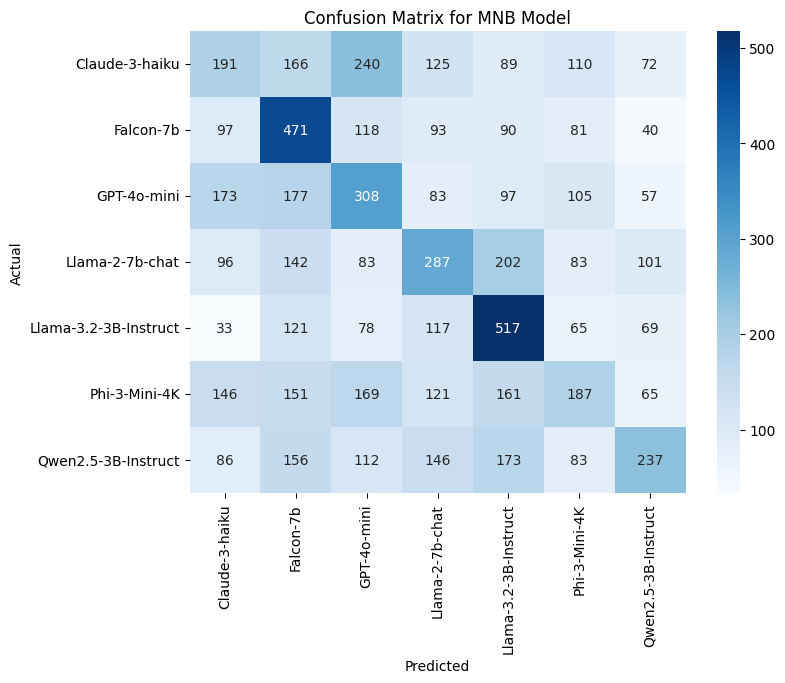


Training KNN model:
KNN - Accuracy: 0.1687
KNN - F1: 0.1646
KNN - Classification Report:
                       precision    recall  f1-score   support

       Claude-3-haiku       0.12      0.26      0.17       993
            Falcon-7b       0.21      0.27      0.24       990
          GPT-4o-mini       0.16      0.15      0.16      1000
      Llama-2-7b-chat       0.17      0.19      0.18       994
Llama-3.2-3B-Instruct       0.33      0.10      0.15      1000
        Phi-3-Mini-4K       0.14      0.10      0.12      1000
  Qwen2.5-3B-Instruct       0.21      0.10      0.14       993

             accuracy                           0.17      6970
            macro avg       0.19      0.17      0.16      6970
         weighted avg       0.19      0.17      0.16      6970



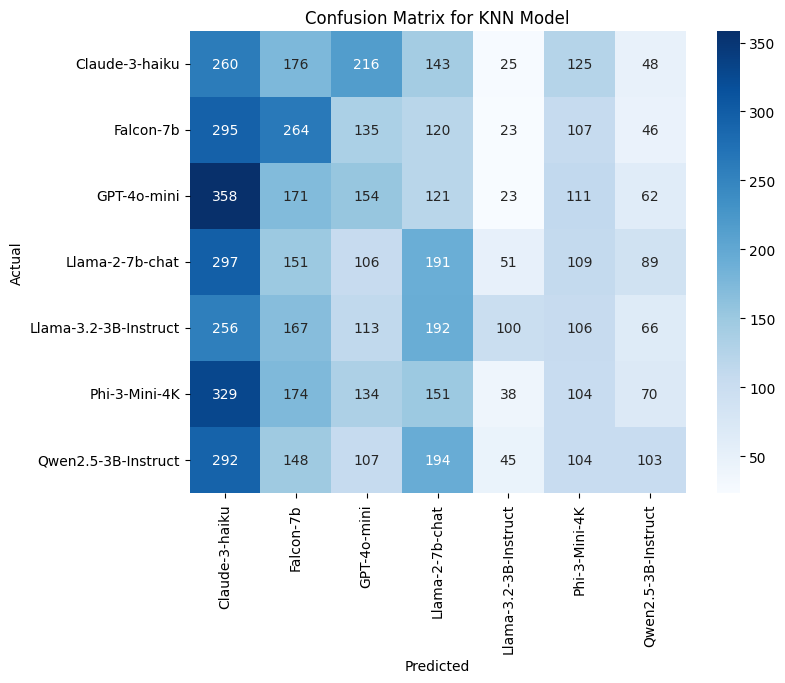


Training LR model:
LR - Accuracy: 0.3976
LR - F1: 0.3923
LR - Classification Report:
                       precision    recall  f1-score   support

       Claude-3-haiku       0.28      0.27      0.28       993
            Falcon-7b       0.43      0.51      0.46       990
          GPT-4o-mini       0.35      0.32      0.33      1000
      Llama-2-7b-chat       0.38      0.42      0.40       994
Llama-3.2-3B-Instruct       0.60      0.67      0.63      1000
        Phi-3-Mini-4K       0.30      0.25      0.27      1000
  Qwen2.5-3B-Instruct       0.39      0.36      0.37       993

             accuracy                           0.40      6970
            macro avg       0.39      0.40      0.39      6970
         weighted avg       0.39      0.40      0.39      6970



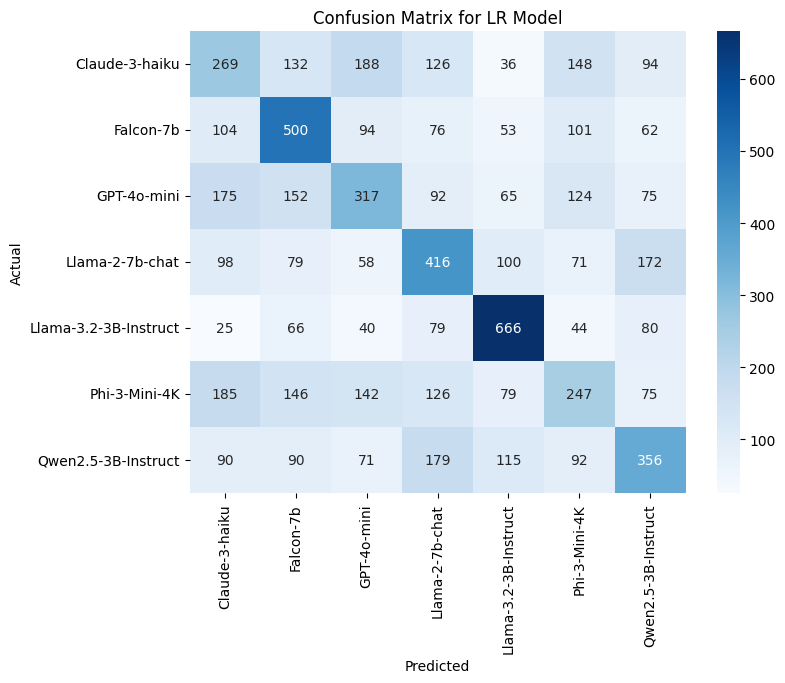


Training DT model:
DT - Accuracy: 0.2634
DT - F1: 0.2648
DT - Classification Report:
                       precision    recall  f1-score   support

       Claude-3-haiku       0.21      0.23      0.22       993
            Falcon-7b       0.26      0.26      0.26       990
          GPT-4o-mini       0.18      0.18      0.18      1000
      Llama-2-7b-chat       0.27      0.28      0.28       994
Llama-3.2-3B-Instruct       0.49      0.45      0.47      1000
        Phi-3-Mini-4K       0.19      0.19      0.19      1000
  Qwen2.5-3B-Instruct       0.25      0.24      0.25       993

             accuracy                           0.26      6970
            macro avg       0.27      0.26      0.26      6970
         weighted avg       0.27      0.26      0.26      6970



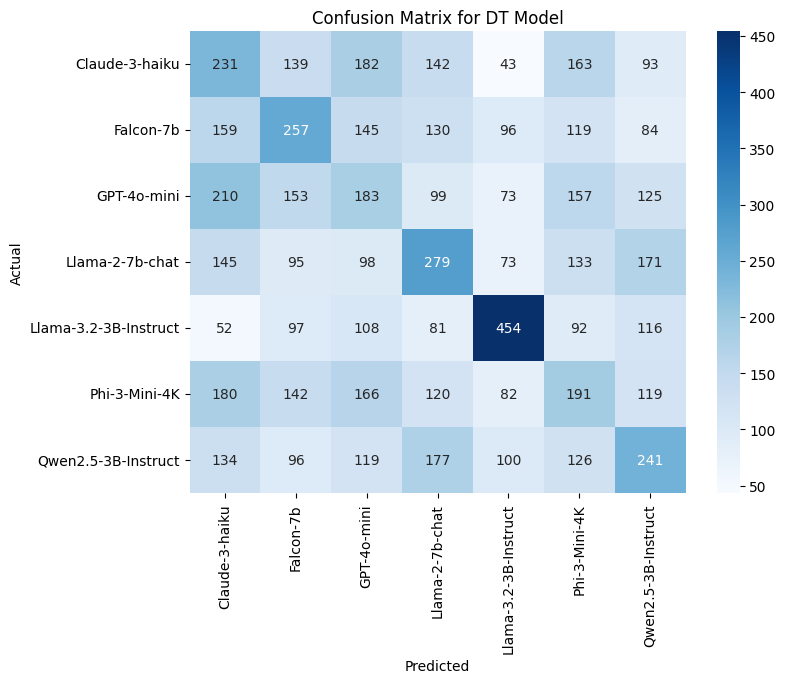


Training RF model:
RF - Accuracy: 0.3581
RF - F1: 0.3523
RF - Classification Report:
                       precision    recall  f1-score   support

       Claude-3-haiku       0.24      0.28      0.26       993
            Falcon-7b       0.40      0.40      0.40       990
          GPT-4o-mini       0.28      0.25      0.26      1000
      Llama-2-7b-chat       0.33      0.36      0.34       994
Llama-3.2-3B-Instruct       0.60      0.69      0.64      1000
        Phi-3-Mini-4K       0.26      0.18      0.21      1000
  Qwen2.5-3B-Instruct       0.35      0.34      0.35       993

             accuracy                           0.36      6970
            macro avg       0.35      0.36      0.35      6970
         weighted avg       0.35      0.36      0.35      6970



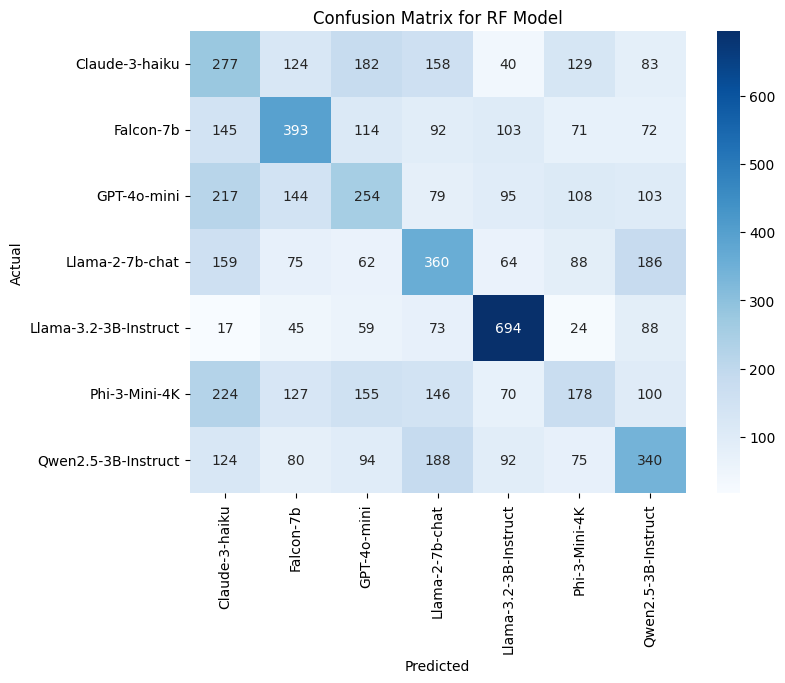


Training XGB model:
XGB - Accuracy: 0.4052
XGB - F1: 0.4003
XGB - Classification Report:
                       precision    recall  f1-score   support

       Claude-3-haiku       0.28      0.33      0.31       993
            Falcon-7b       0.44      0.46      0.45       990
          GPT-4o-mini       0.32      0.30      0.31      1000
      Llama-2-7b-chat       0.40      0.47      0.43       994
Llama-3.2-3B-Instruct       0.62      0.69      0.65      1000
        Phi-3-Mini-4K       0.35      0.23      0.27      1000
  Qwen2.5-3B-Instruct       0.40      0.36      0.38       993

             accuracy                           0.41      6970
            macro avg       0.40      0.41      0.40      6970
         weighted avg       0.40      0.41      0.40      6970



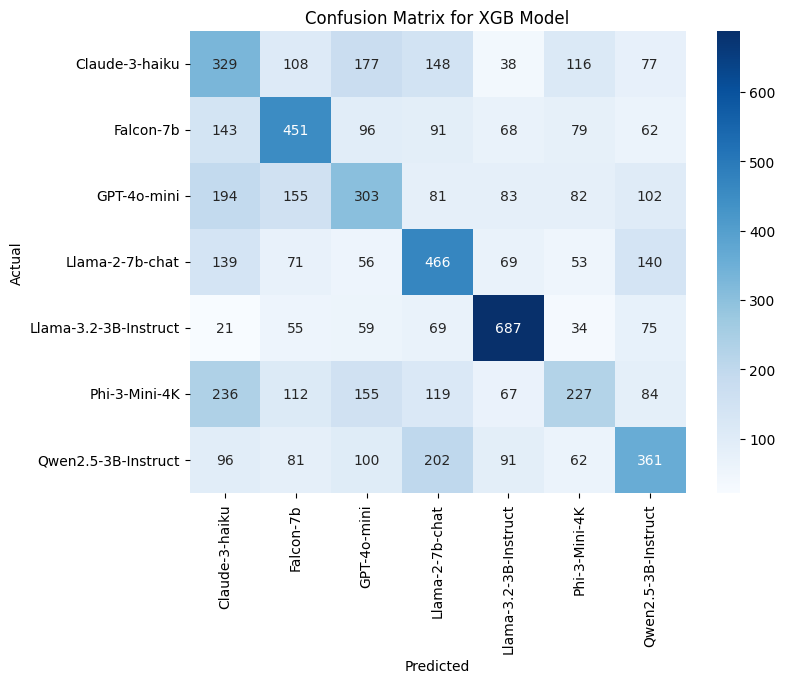

In [5]:
from Model_Evaluation.load_and_preprocess import AdvancedTokenizer, prepare_data_for_ml
from Model_Evaluation.base_model_ML import train_and_evaluate_models
# Initialize tokenizer
print("Initialize tokenizer")
tokenizer = AdvancedTokenizer(tokenizer_type='spacy')  # or 'nltk'

# Prepare data for machine learning
print("Prepare data for machine learning")
X_train_tfidf, X_test_tfidf = prepare_data_for_ml(X_train_val, X_test, tokenizer)

results = train_and_evaluate_models(X_train_tfidf, X_test_tfidf, y_train_val, y_test, label_encoder)

Neural Network - RNN, LSTM, GRU, BiLSTM, CNNBiLSTM

/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Epoch 1/50, Train Loss: 1.9015, Val Loss: 1.8451
Epoch 2/50, Train Loss: 1.8264, Val Loss: 1.8053
Epoch 3/50, Train Loss: 1.7915, Val Loss: 1.7785
Epoch 4/50, Train Loss: 1.7678, Val Loss: 1.7636
Epoch 5/50, Train Loss: 1.7491, Val Loss: 1.7592
Epoch 6/50, Train Loss: 1.7358, Val Loss: 1.7477
Epoch 7/50, Train Loss: 1.7188, Val Loss: 1.7513
Epoch 8/50, Train Loss: 1.7096, Val Loss: 1.7479
Epoch 9/50, Train Loss: 1.6935, Val Loss: 1.7430
Epoch 10/50, Train Loss: 1.6802, Val Loss: 1.7352
Epoch 11/50, Train Loss: 1.6720, Val Loss: 1.7374
Epoch 12/50, Train Loss: 1.6601, Val Loss: 1.7419
Epoch 13/50, Train Loss: 1.6475, Val Loss: 1.7459
Epoch 14/50, Train Loss: 1.6391, Val Loss: 1.7340
Epoch 15/50, Train Loss: 1.6285, Val Loss: 1.7247
Epoch 16/50, Train Loss: 1.6172, Val Loss: 1.7289
Epoch 17/50, Train Loss: 1.6043, Val Loss: 1.7292
Epoch 18/50, Train Loss: 1.5972, Val Loss: 1.7271
Epoch 19/50, Train Loss: 1.5883, Val Loss: 1.7265
Epoch 20/50, Train Loss: 1.5619, Val Loss: 1.7242
Epoch 21/

Evaluating:   0%|          | 0/218 [00:00<?, ?it/s]

RNNClassifier - Accuracy: 0.4258
RNNClassifier - F1: 0.4183

Classification Report:
                       precision    recall  f1-score   support

       Claude-3-haiku       0.34      0.37      0.35       993
            Falcon-7b       0.49      0.46      0.47       990
          GPT-4o-mini       0.34      0.38      0.36      1000
      Llama-2-7b-chat       0.42      0.50      0.46       994
Llama-3.2-3B-Instruct       0.71      0.72      0.71      1000
        Phi-3-Mini-4K       0.20      0.12      0.15      1000
  Qwen2.5-3B-Instruct       0.42      0.44      0.43       993

             accuracy                           0.43      6970
            macro avg       0.42      0.43      0.42      6970
         weighted avg       0.42      0.43      0.42      6970



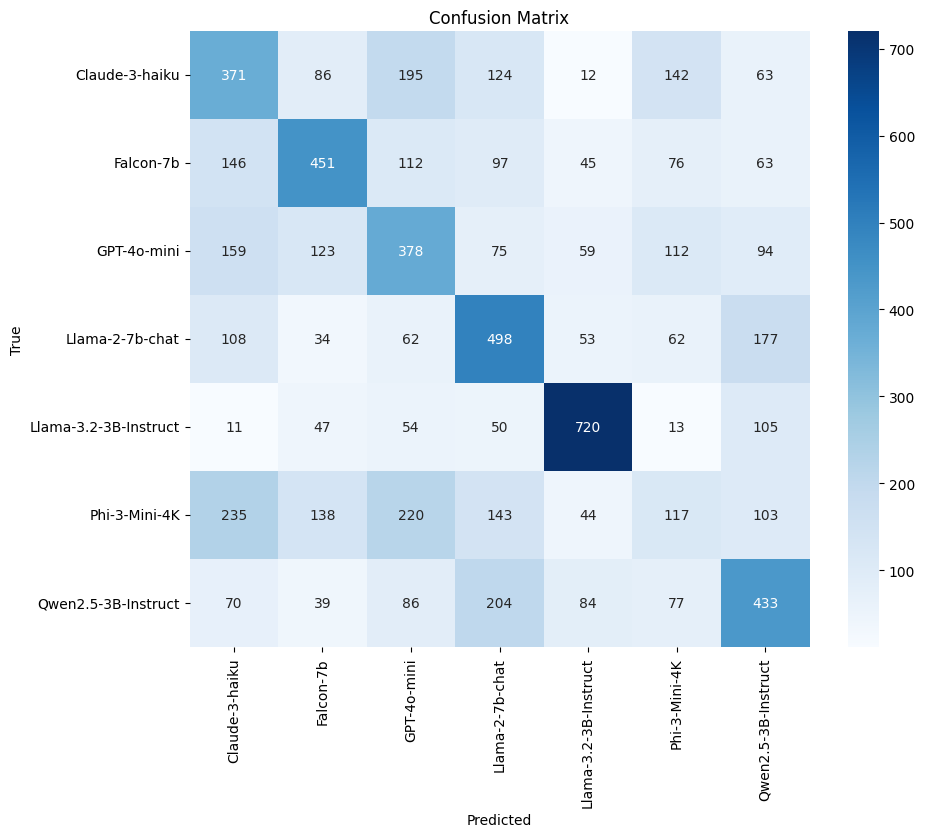

Epoch 1/50, Train Loss: 1.8947, Val Loss: 1.8337
Epoch 2/50, Train Loss: 1.8034, Val Loss: 1.7852
Epoch 3/50, Train Loss: 1.7701, Val Loss: 1.7708
Epoch 4/50, Train Loss: 1.7474, Val Loss: 1.7692
Epoch 5/50, Train Loss: 1.7241, Val Loss: 1.7583
Epoch 6/50, Train Loss: 1.7038, Val Loss: 1.7531
Epoch 7/50, Train Loss: 1.6872, Val Loss: 1.7476
Epoch 8/50, Train Loss: 1.6727, Val Loss: 1.7456
Epoch 9/50, Train Loss: 1.6600, Val Loss: 1.7494
Epoch 10/50, Train Loss: 1.6470, Val Loss: 1.7478
Epoch 11/50, Train Loss: 1.6399, Val Loss: 1.7450
Epoch 12/50, Train Loss: 1.6332, Val Loss: 1.7402
Epoch 13/50, Train Loss: 1.6254, Val Loss: 1.7437
Epoch 14/50, Train Loss: 1.6156, Val Loss: 1.7422
Epoch 15/50, Train Loss: 1.6074, Val Loss: 1.7424
Epoch 16/50, Train Loss: 1.6011, Val Loss: 1.7457
Epoch 17/50, Train Loss: 1.5840, Val Loss: 1.7405
Epoch 18/50, Train Loss: 1.5735, Val Loss: 1.7398
Epoch 19/50, Train Loss: 1.5698, Val Loss: 1.7417
Epoch 20/50, Train Loss: 1.5647, Val Loss: 1.7440
Epoch 21/

Evaluating:   0%|          | 0/218 [00:00<?, ?it/s]

LSTMClassifier - Accuracy: 0.4204
LSTMClassifier - F1: 0.4162

Classification Report:
                       precision    recall  f1-score   support

       Claude-3-haiku       0.32      0.37      0.34       993
            Falcon-7b       0.51      0.44      0.47       990
          GPT-4o-mini       0.34      0.37      0.35      1000
      Llama-2-7b-chat       0.39      0.47      0.43       994
Llama-3.2-3B-Instruct       0.70      0.70      0.70      1000
        Phi-3-Mini-4K       0.23      0.15      0.18      1000
  Qwen2.5-3B-Instruct       0.44      0.45      0.44       993

             accuracy                           0.42      6970
            macro avg       0.42      0.42      0.42      6970
         weighted avg       0.42      0.42      0.42      6970



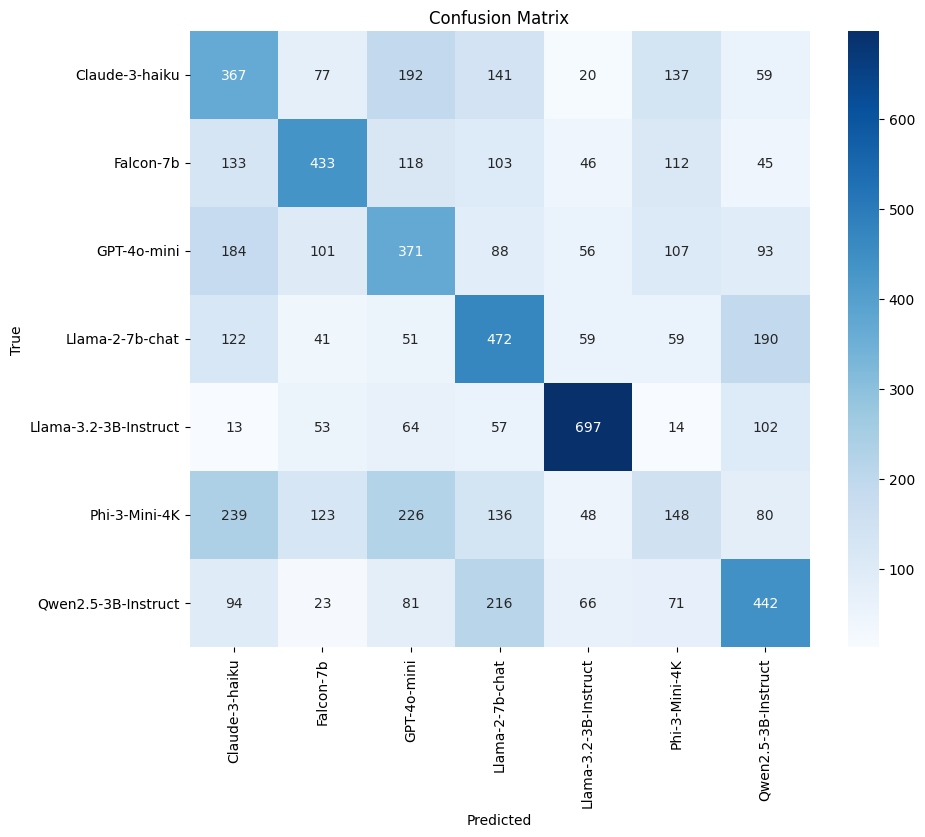

Epoch 1/50, Train Loss: 1.8829, Val Loss: 1.8144
Epoch 2/50, Train Loss: 1.7903, Val Loss: 1.7837
Epoch 3/50, Train Loss: 1.7621, Val Loss: 1.7701
Epoch 4/50, Train Loss: 1.7394, Val Loss: 1.7611
Epoch 5/50, Train Loss: 1.7221, Val Loss: 1.7550
Epoch 6/50, Train Loss: 1.7043, Val Loss: 1.7602
Epoch 7/50, Train Loss: 1.6880, Val Loss: 1.7440
Epoch 8/50, Train Loss: 1.6718, Val Loss: 1.7510
Epoch 9/50, Train Loss: 1.6598, Val Loss: 1.7423
Epoch 10/50, Train Loss: 1.6450, Val Loss: 1.7523
Epoch 11/50, Train Loss: 1.6345, Val Loss: 1.7452
Epoch 12/50, Train Loss: 1.6226, Val Loss: 1.7442
Epoch 13/50, Train Loss: 1.6129, Val Loss: 1.7433
Epoch 14/50, Train Loss: 1.5913, Val Loss: 1.7391
Epoch 15/50, Train Loss: 1.5868, Val Loss: 1.7393
Epoch 16/50, Train Loss: 1.5847, Val Loss: 1.7395
Epoch 17/50, Train Loss: 1.5813, Val Loss: 1.7394
Epoch 18/50, Train Loss: 1.5789, Val Loss: 1.7401
Epoch 19/50, Train Loss: 1.5769, Val Loss: 1.7398
Epoch 20/50, Train Loss: 1.5756, Val Loss: 1.7399
Epoch 21/

Evaluating:   0%|          | 0/218 [00:00<?, ?it/s]

GRUClassifier - Accuracy: 0.4268
GRUClassifier - F1: 0.3983

Classification Report:
                       precision    recall  f1-score   support

       Claude-3-haiku       0.32      0.42      0.37       993
            Falcon-7b       0.47      0.46      0.46       990
          GPT-4o-mini       0.32      0.41      0.36      1000
      Llama-2-7b-chat       0.42      0.51      0.46       994
Llama-3.2-3B-Instruct       0.71      0.71      0.71      1000
        Phi-3-Mini-4K       0.00      0.00      0.00      1000
  Qwen2.5-3B-Instruct       0.39      0.46      0.42       993

             accuracy                           0.43      6970
            macro avg       0.38      0.43      0.40      6970
         weighted avg       0.38      0.43      0.40      6970



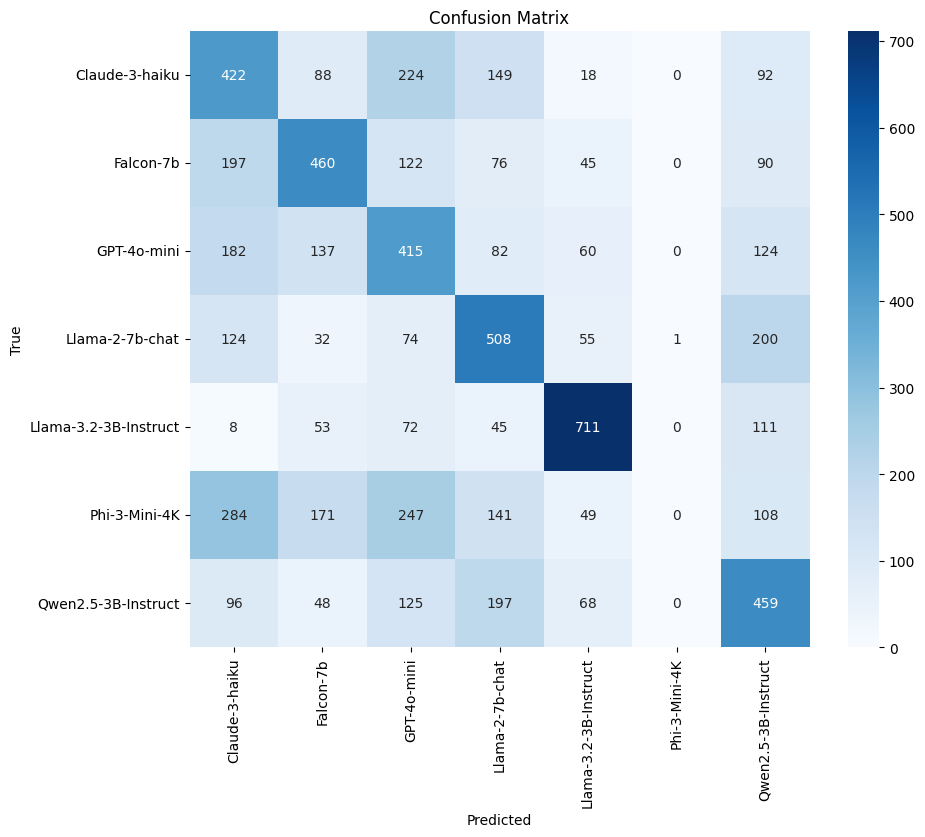

Epoch 1/50, Train Loss: 1.7257, Val Loss: 1.6018
Epoch 2/50, Train Loss: 1.5311, Val Loss: 1.5424
Epoch 3/50, Train Loss: 1.4445, Val Loss: 1.5265
Epoch 4/50, Train Loss: 1.3681, Val Loss: 1.5068
Epoch 5/50, Train Loss: 1.2893, Val Loss: 1.4852
Epoch 6/50, Train Loss: 1.2101, Val Loss: 1.5329
Epoch 7/50, Train Loss: 1.1330, Val Loss: 1.5745
Epoch 8/50, Train Loss: 1.0523, Val Loss: 1.6167
Epoch 9/50, Train Loss: 0.9647, Val Loss: 1.6581
Epoch 10/50, Train Loss: 0.8007, Val Loss: 1.7270
Epoch 11/50, Train Loss: 0.7590, Val Loss: 1.7872
Epoch 12/50, Train Loss: 0.7330, Val Loss: 1.8433
Epoch 13/50, Train Loss: 0.7139, Val Loss: 1.8579
Epoch 14/50, Train Loss: 0.6822, Val Loss: 1.8745
Epoch 15/50, Train Loss: 0.6816, Val Loss: 1.8825
Early stopping triggered after 15 epochs


Evaluating:   0%|          | 0/218 [00:00<?, ?it/s]

BiLSTMClassifier - Accuracy: 0.4446
BiLSTMClassifier - F1: 0.4433

Classification Report:
                       precision    recall  f1-score   support

       Claude-3-haiku       0.34      0.33      0.33       993
            Falcon-7b       0.53      0.53      0.53       990
          GPT-4o-mini       0.36      0.37      0.37      1000
      Llama-2-7b-chat       0.42      0.47      0.44       994
Llama-3.2-3B-Instruct       0.73      0.72      0.73      1000
        Phi-3-Mini-4K       0.30      0.26      0.28      1000
  Qwen2.5-3B-Instruct       0.43      0.43      0.43       993

             accuracy                           0.44      6970
            macro avg       0.44      0.44      0.44      6970
         weighted avg       0.44      0.44      0.44      6970



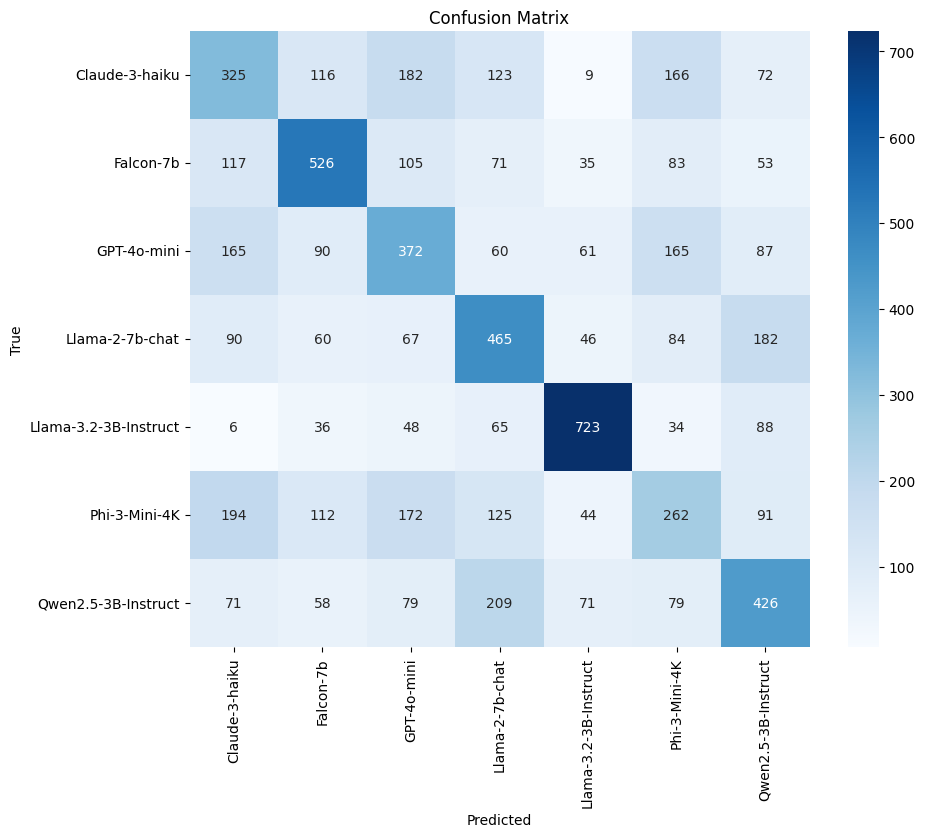

Epoch 1/50, Train Loss: 1.7084, Val Loss: 1.5863
Epoch 2/50, Train Loss: 1.4694, Val Loss: 1.5312
Epoch 3/50, Train Loss: 1.2826, Val Loss: 1.5295
Epoch 4/50, Train Loss: 1.0804, Val Loss: 1.6567
Epoch 5/50, Train Loss: 0.8793, Val Loss: 1.8186
Epoch 6/50, Train Loss: 0.6903, Val Loss: 2.1694
Epoch 7/50, Train Loss: 0.5285, Val Loss: 2.4664
Epoch 8/50, Train Loss: 0.2981, Val Loss: 2.6352
Epoch 9/50, Train Loss: 0.2421, Val Loss: 2.8067
Epoch 10/50, Train Loss: 0.2078, Val Loss: 2.9391
Epoch 11/50, Train Loss: 0.1801, Val Loss: 3.0742
Epoch 12/50, Train Loss: 0.1480, Val Loss: 3.0969
Epoch 13/50, Train Loss: 0.1464, Val Loss: 3.1178
Early stopping triggered after 13 epochs


Evaluating:   0%|          | 0/218 [00:00<?, ?it/s]

CNNBiLSTMClassifier - Accuracy: 0.3914
CNNBiLSTMClassifier - F1: 0.3938

Classification Report:
                       precision    recall  f1-score   support

       Claude-3-haiku       0.32      0.29      0.30       993
            Falcon-7b       0.48      0.41      0.44       990
          GPT-4o-mini       0.30      0.32      0.31      1000
      Llama-2-7b-chat       0.38      0.39      0.39       994
Llama-3.2-3B-Instruct       0.68      0.67      0.68      1000
        Phi-3-Mini-4K       0.25      0.30      0.27      1000
  Qwen2.5-3B-Instruct       0.38      0.36      0.37       993

             accuracy                           0.39      6970
            macro avg       0.40      0.39      0.39      6970
         weighted avg       0.40      0.39      0.39      6970



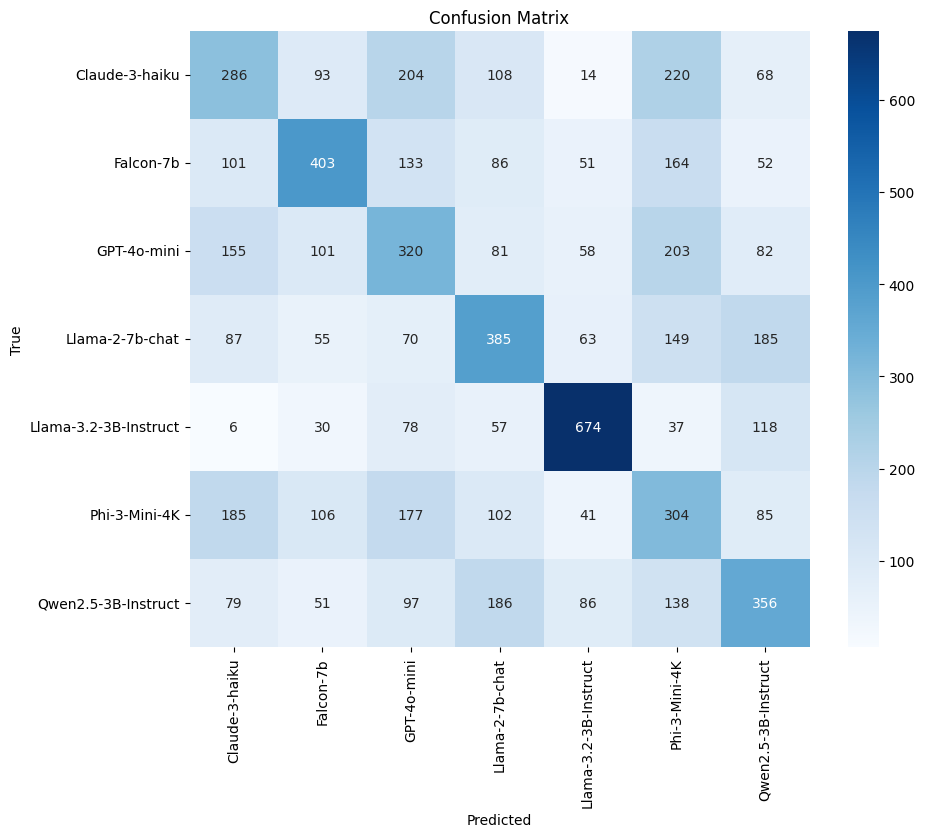

In [3]:
from Model_Evaluation.base_model_NN import train_and_evaluate_NN
from Model_Evaluation.base_model_NN import RNNClassifier, LSTMClassifier, GRUClassifier, BiLSTMClassifier, CNNBiLSTMClassifier

from transformers import DebertaV2Model, DebertaV2Config, DebertaV2Tokenizer
tokenizer = DebertaV2Tokenizer.from_pretrained('microsoft/deberta-v3-base')

vocab_size = tokenizer.vocab_size  # 예시 값
embed_dim = 256
hidden_dim = 512
num_classes = 7 
weight_decay = 0.02
num_epochs=50
patience=10
val_split=0.2
max_len=128
batch_size=32
save_model_flag = False

# RNNClassifier 
rnn_results = train_and_evaluate_NN(
    RNNClassifier, X_train_val, X_test, y_train_val, y_test, label_encoder, tokenizer, 
    embed_dim, hidden_dim, max_len, batch_size, num_epochs, patience, val_split, save_model_flag
)
# print("RNN Results:", rnn_results)

# LSTMClassifier
lstm_results = train_and_evaluate_NN(
    LSTMClassifier, X_train_val, X_test, y_train_val, y_test, label_encoder, tokenizer, 
    embed_dim, hidden_dim, max_len, batch_size, num_epochs, patience, val_split, save_model_flag
)
# print("LSTM Results:", lstm_results)

# GRUClassifier
gru_results = train_and_evaluate_NN(
    GRUClassifier, X_train_val, X_test, y_train_val, y_test, label_encoder, tokenizer, 
    embed_dim, hidden_dim, max_len, batch_size, num_epochs, patience, val_split, save_model_flag
)
# print("GRU Results:", gru_results)

#BiLSTMClassifier
Bilstm_result = train_and_evaluate_NN(
    BiLSTMClassifier, X_train_val, X_test, y_train_val, y_test, label_encoder, tokenizer, 
    embed_dim, hidden_dim, max_len, batch_size, num_epochs, patience, val_split, save_model_flag
)
# print("BiLSTM Results:", Bilstm_result)

#CNNBiLSTMClassifier
cnnBilstm_results = train_and_evaluate_NN(
    CNNBiLSTMClassifier, X_train_val, X_test, y_train_val, y_test, label_encoder, tokenizer, 
    embed_dim, hidden_dim, max_len, batch_size, num_epochs, patience, val_split, save_model_flag
)
# print("CNNBiLSTM Results:", cnnBilstm_results)

#### Transformer based Encoder only classifier 

In [1]:
from Model_Evaluation.load_and_preprocess import load_and_preprocess_data, preprocess_data, create_data_loaders, TextDataset
import numpy as np
import random 

# SEED FIXED
SEED = 20241006
np.random.seed(SEED)
random.seed(SEED)

file_paths = ['DataSet/X_ij_samples_5k_Claude-3-haiku.csv', 
              'DataSet/X_ij_samples_5k_Falcon-7b.csv', 
              'DataSet/X_ij_samples_5k_Qwen2.5-3B-Instruct.csv',
              'DataSet/X_ij_samples_5k_GPT-4o-mini.csv',
              'DataSet/X_ij_samples_5k_Llama-3.2-3B-Instruct.csv',
              'DataSet/X_ij_samples_5k_Llama-2-7b-chat.csv',
              'DataSet/X_ij_samples_5k_Phi-3-Mini-4K.csv']

X_train, X_test, X_val, y_train, y_test, y_val, label_encoder, combined_df, combined_df_temp = load_and_preprocess_data(file_paths)

# Merge train set and Val set for base models...
X_train_val = X_train + X_val
y_train_val = np.concatenate((y_train, y_val))

2024-10-05 20:46:18.434329: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-05 20:46:18.434435: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-05 20:46:18.436162: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-05 20:46:18.446820: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-05 20:46:20.146868: W tensorflow/compiler/tf2

Sample counts for each LLM model:
Claude-3-haiku:
  Train: 3179
  Val: 795
  Test:  993

Falcon-7b:
  Train: 3168
  Val: 792
  Test:  990

GPT-4o-mini:
  Train: 3198
  Val: 800
  Test:  1000

Llama-2-7b-chat:
  Train: 3182
  Val: 796
  Test:  994

Llama-3.2-3B-Instruct:
  Train: 3198
  Val: 799
  Test:  1000

Phi-3-Mini-4K:
  Train: 3197
  Val: 800
  Test:  1000

Qwen2.5-3B-Instruct:
  Train: 3178
  Val: 794
  Test:  993



/notebooks/CSE584_Midterm/Model_Evaluation/load_and_preprocess.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['LLM_encoded'] = le.fit_transform(combined_df['LLM'])


In [4]:
from Model_Evaluation.DL_train_and_eval import train_and_evaluate
from Model_Evaluation.Encoder_only_Classifier import BERTClassifier, XLNetClassifier, RoBERTaClassifier, DeBERTaV3Classifier
from transformers import BertModel, BertTokenizer
from transformers import RobertaModel, RobertaTokenizer
from transformers import XLNetModel, XLNetTokenizer
from transformers import DebertaModel, DebertaV2Model, DebertaTokenizer, DebertaV2Tokenizer

max_len=128
batch_size=32
num_epochs=20  
patience=5
save_model_flag = False

/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/20:   0%|          | 0/697 [00:00<?, ?it/s]

Epoch 1/20, Train Loss: 1.8640, Val Loss: 1.5410


Epoch 2/20:   0%|          | 0/697 [00:00<?, ?it/s]

Epoch 2/20, Train Loss: 1.4207, Val Loss: 1.3184


Epoch 3/20:   0%|          | 0/697 [00:00<?, ?it/s]

Epoch 3/20, Train Loss: 1.1196, Val Loss: 1.2705


Epoch 4/20:   0%|          | 0/697 [00:00<?, ?it/s]

Epoch 4/20, Train Loss: 0.8130, Val Loss: 1.3508


Epoch 5/20:   0%|          | 0/697 [00:00<?, ?it/s]

Epoch 5/20, Train Loss: 0.5678, Val Loss: 1.4556


Epoch 6/20:   0%|          | 0/697 [00:00<?, ?it/s]

Epoch 6/20, Train Loss: 0.4009, Val Loss: 1.6780


Epoch 7/20:   0%|          | 0/697 [00:00<?, ?it/s]

Epoch 7/20, Train Loss: 0.3080, Val Loss: 1.7813


Epoch 8/20:   0%|          | 0/697 [00:00<?, ?it/s]

Epoch 8/20, Train Loss: 0.2473, Val Loss: 1.8971
Early stopping triggered after 8 epochs


Evaluating:   0%|          | 0/218 [00:00<?, ?it/s]

BERTClassifier - Accuracy: 0.5407
BERTClassifier - F1: 0.5428

Classification Report:
                       precision    recall  f1-score   support

       Claude-3-haiku       0.41      0.48      0.44       993
            Falcon-7b       0.61      0.63      0.62       990
          GPT-4o-mini       0.39      0.59      0.47      1000
      Llama-2-7b-chat       0.52      0.51      0.51       994
Llama-3.2-3B-Instruct       0.81      0.75      0.78      1000
        Phi-3-Mini-4K       0.58      0.36      0.45      1000
  Qwen2.5-3B-Instruct       0.62      0.46      0.53       993

             accuracy                           0.54      6970
            macro avg       0.56      0.54      0.54      6970
         weighted avg       0.56      0.54      0.54      6970



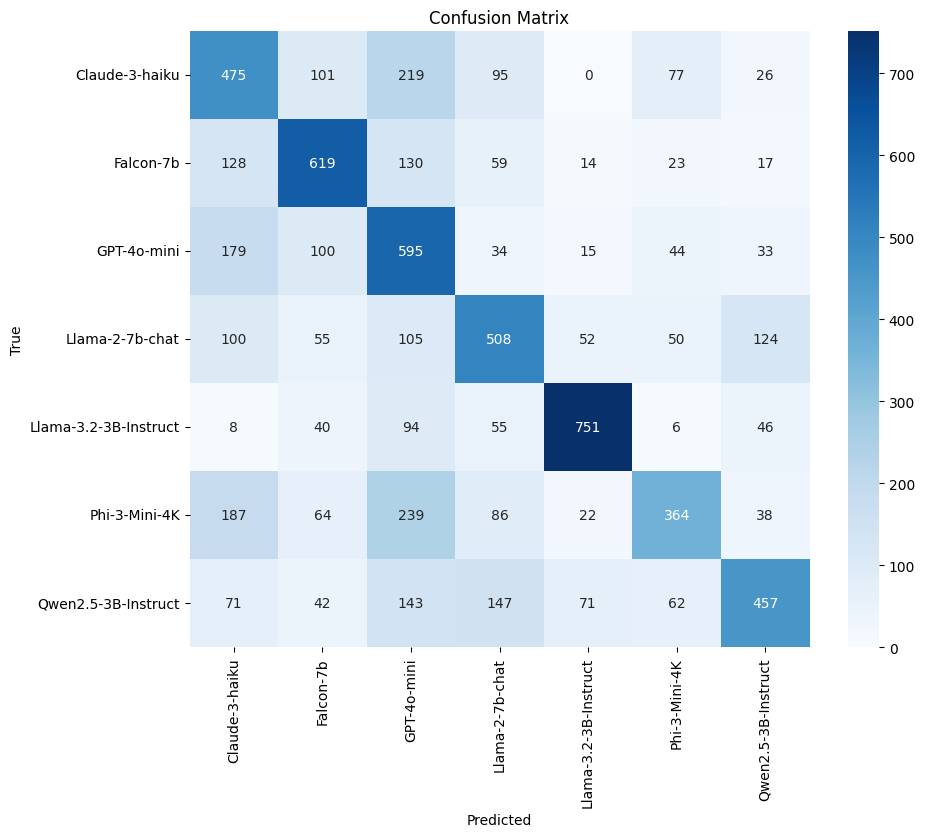

BERT Results: {'accuracy': 0.5407460545193687, 'f1_score': 0.5428012434158225, 'confusion_matrix': array([[475, 101, 219,  95,   0,  77,  26],
       [128, 619, 130,  59,  14,  23,  17],
       [179, 100, 595,  34,  15,  44,  33],
       [100,  55, 105, 508,  52,  50, 124],
       [  8,  40,  94,  55, 751,   6,  46],
       [187,  64, 239,  86,  22, 364,  38],
       [ 71,  42, 143, 147,  71,  62, 457]])}


spiece.model:   0%|          | 0.00/798k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/760 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/467M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


AttributeError: 'XLNetModel' object has no attribute 'embeddings'

In [2]:
Bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_results = train_and_evaluate(BERTClassifier, 
                                  X_train, X_val, X_test, y_train, y_val, y_test, label_encoder, 
                                  Bert_tokenizer,
                                  max_len, batch_size, num_epochs, patience, save_model_flag = False)
print("BERT Results:", bert_results)

In [ ]:
Xlnet_tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased')
Xlnet_results = train_and_evaluate(XLNetClassifier, 
                                  X_train, X_val, X_test, y_train, y_val, y_test, label_encoder, 
                                  Xlnet_tokenizer,
                                  max_len, batch_size, num_epochs, patience, save_model_flag = False)
print("XLnet Results:", Xlnet_results)

spiece.model:   0%|          | 0.00/798k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/760 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/467M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/20:   0%|          | 0/697 [00:00<?, ?it/s]

Epoch 1/20, Train Loss: 1.9566, Val Loss: 1.5472


Epoch 2/20:   0%|          | 0/697 [00:00<?, ?it/s]

Epoch 2/20, Train Loss: 1.4511, Val Loss: 1.3601


Epoch 3/20:   0%|          | 0/697 [00:00<?, ?it/s]

Epoch 3/20, Train Loss: 1.2134, Val Loss: 1.2830


Epoch 4/20:   0%|          | 0/697 [00:00<?, ?it/s]

Epoch 4/20, Train Loss: 0.9623, Val Loss: 1.3694


Epoch 5/20:   0%|          | 0/697 [00:00<?, ?it/s]

Epoch 5/20, Train Loss: 0.7244, Val Loss: 1.4421


Epoch 6/20:   0%|          | 0/697 [00:00<?, ?it/s]

In [ ]:
RoBERTa_tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
RoBERTa_results = train_and_evaluate(RoBERTaClassifier, 
                                  X_train, X_val, X_test, y_train, y_val, y_test, label_encoder, 
                                  RoBERTa_tokenizer,
                                  max_len, batch_size, num_epochs, patience, save_model_flag = False)
print("RoBERTa Results:", RoBERTa_results)

In [ ]:
DebertaV3_tokenizer = DebertaV2Tokenizer.from_pretrained('microsoft/deberta-v3-base')
DebertaV3_results = train_and_evaluate(DeBERTaV3Classifier, 
                                  X_train, X_val, X_test, y_train, y_val, y_test, label_encoder, 
                                  DebertaV3_tokenizer,
                                  max_len, batch_size, num_epochs, patience, save_model_flag = False)
print("RoBERTa Results:", DebertaV3_results)

In [ ]:
file_paths = ['DataSet/X_ij_samples_5k_Claude-3-haiku.csv', 
              # 'DataSet/X_ij_samples_5k_Falcon-7b.csv', 
              'DataSet/X_ij_samples_5k_Qwen2.5-3B-Instruct.csv',
              'DataSet/X_ij_samples_5k_GPT-4o-mini.csv',
              'DataSet/X_ij_samples_5k_Llama-3.2-3B-Instruct.csv',
              # 'DataSet/X_ij_samples_5k_Llama-2-7b-chat.csv',
              'DataSet/X_ij_samples_5k_Phi-3-Mini-4K.csv']

X_train, X_test, X_val, y_train, y_test, y_val, label_encoder, combined_df, combined_df_temp = load_and_preprocess_data(file_paths)

In [ ]:
DebertaV3_tokenizer = DebertaV2Tokenizer.from_pretrained('microsoft/deberta-v3-base')
DebertaV3_results = train_and_evaluate(DeBERTaV3Classifier, 
                                  X_train, X_val, X_test, y_train, y_val, y_test, label_encoder, 
                                  DebertaV3_tokenizer,
                                  max_len, batch_size, num_epochs, patience, save_model_flag = False)
print("RoBERTa Results:", DebertaV3_results)